<a href="https://colab.research.google.com/github/javadasoodeh/Kaggle-Practice-Notebooks/blob/main/HealthCareCostPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Health Care Cost Prediction with Linear Regression Models



## Libraries Installation and Importation

In [ ]:
!pip install pandas plotnine matplotlib

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Setting Seed and Data Import

In [14]:
# Construct the file path
file_path = '/content/sample_data/insurance.csv'
data = pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Understanding and Describing the Data


In [3]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Exploratory Data Analysis (EDA)


### 1. Correlation between Charges and Age / BMI

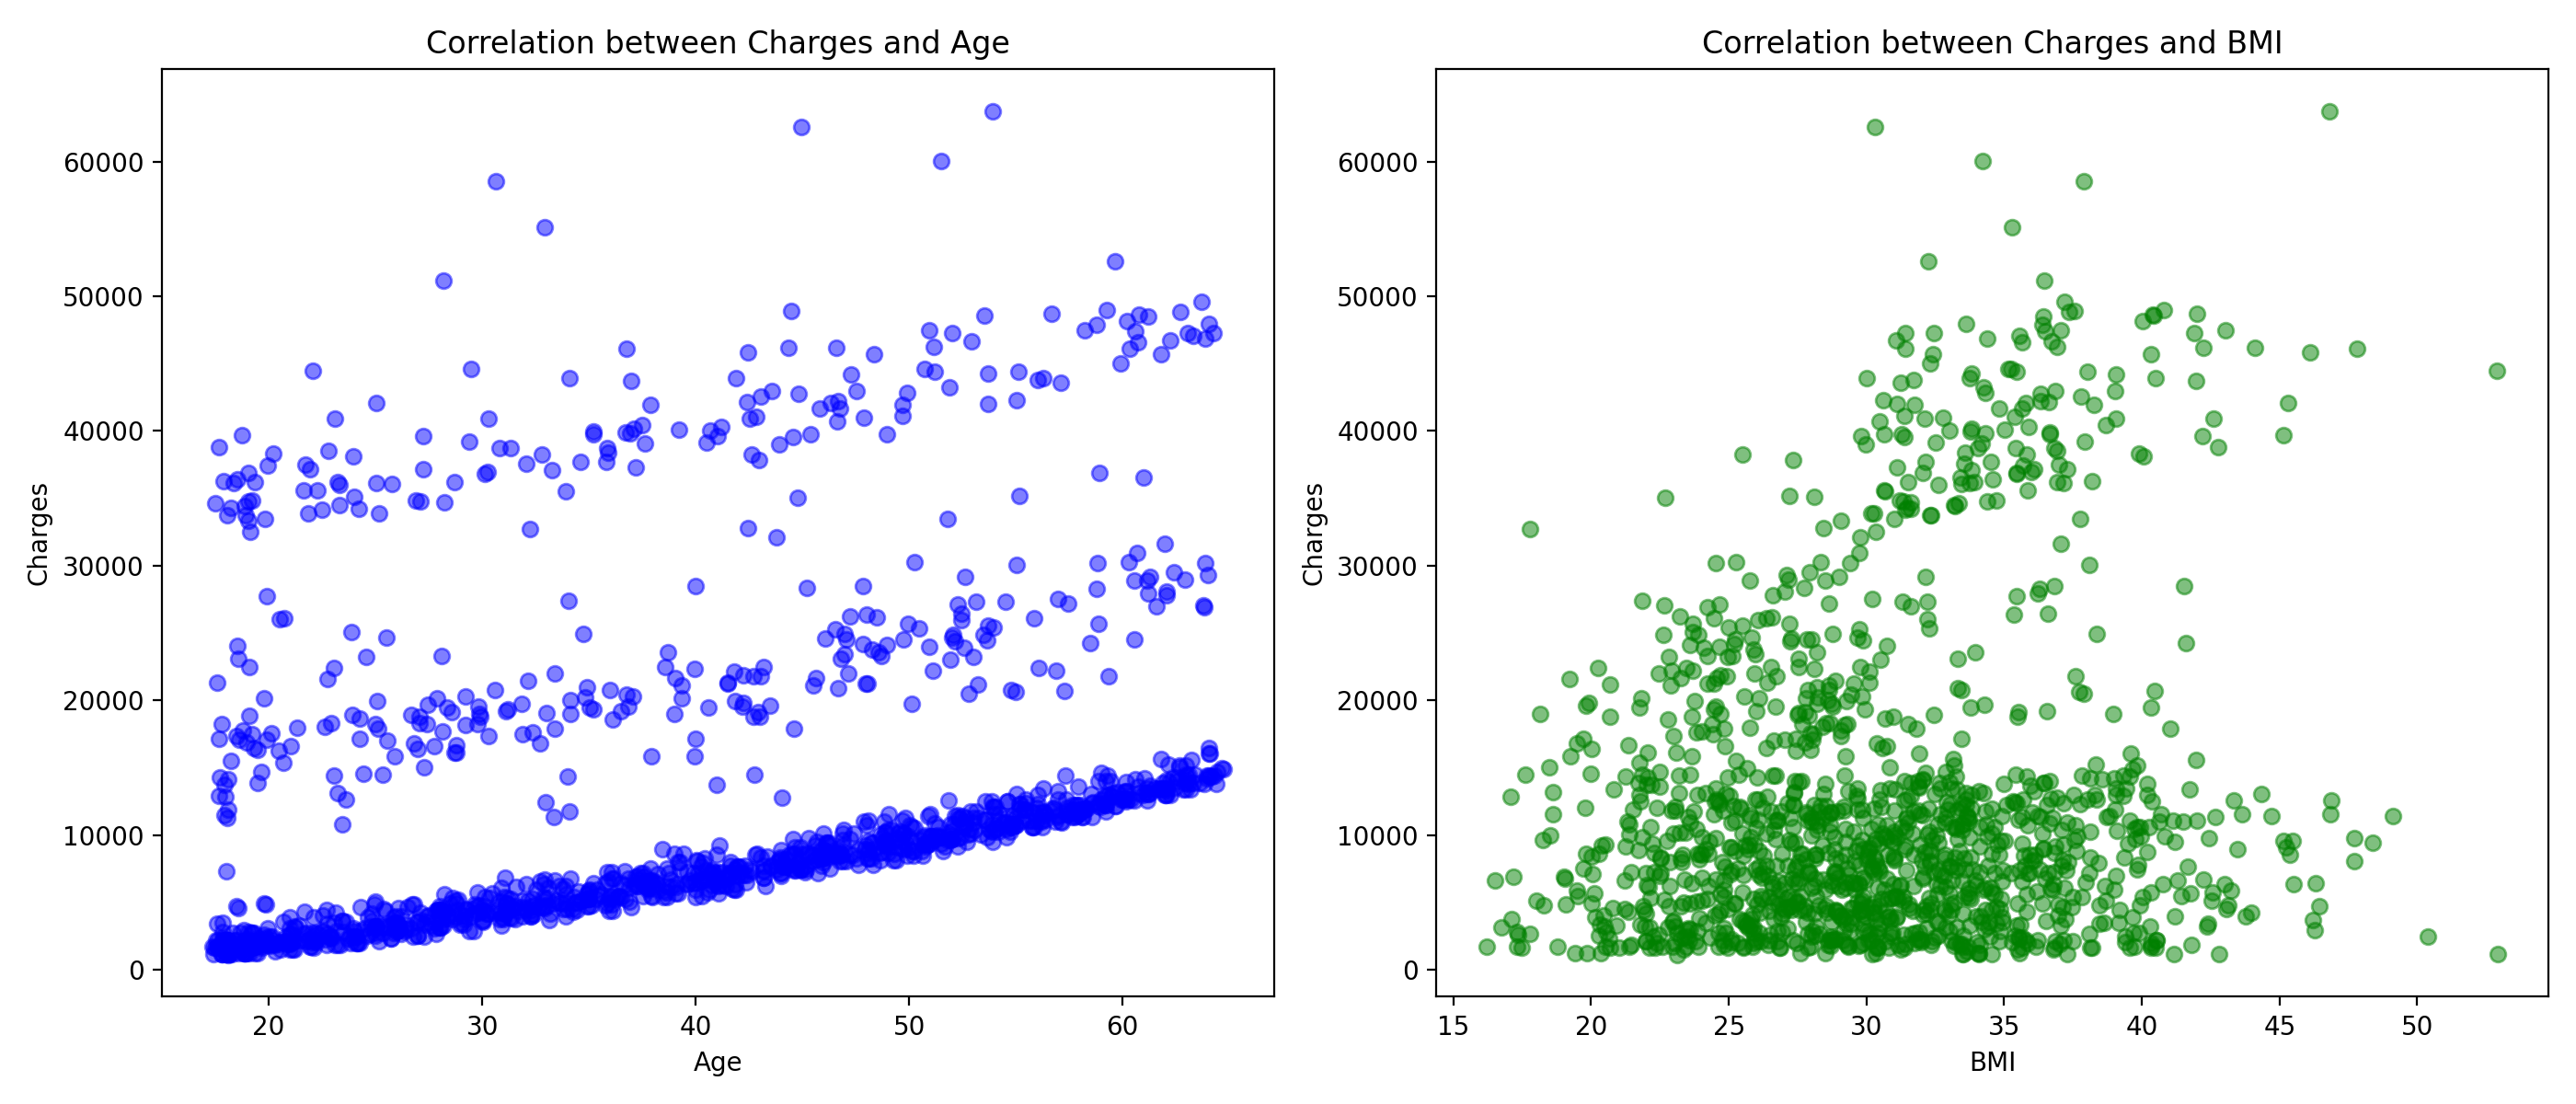

In [17]:
def jitter(values, sd=0.3):
    return values + np.random.normal(0, sd, size=len(values))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Age vs. Charges
axes[0].scatter(jitter(data['age']), data['charges'], alpha=0.5, color='blue')
axes[0].set_title('Correlation between Charges and Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')

# Plot for BMI vs. Charges
axes[1].scatter(jitter(data['bmi']), data['charges'], alpha=0.5, color='green')
axes[1].set_title('Correlation between Charges and BMI')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')

plt.tight_layout()
plt.show()

### 2. Correlation between Charges and Sex / Children covered by insurance

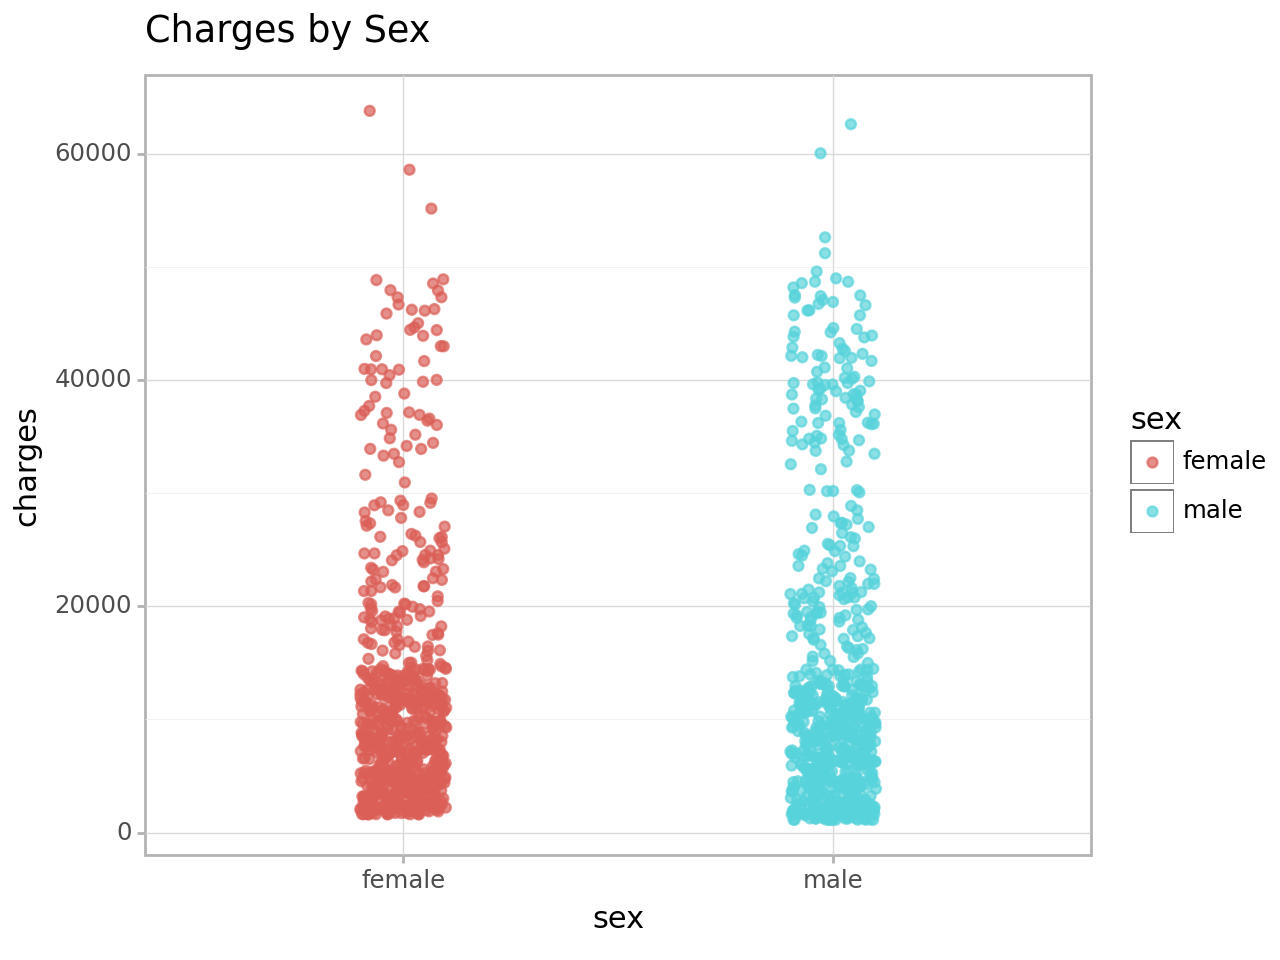

<Figure Size: (640 x 480)>

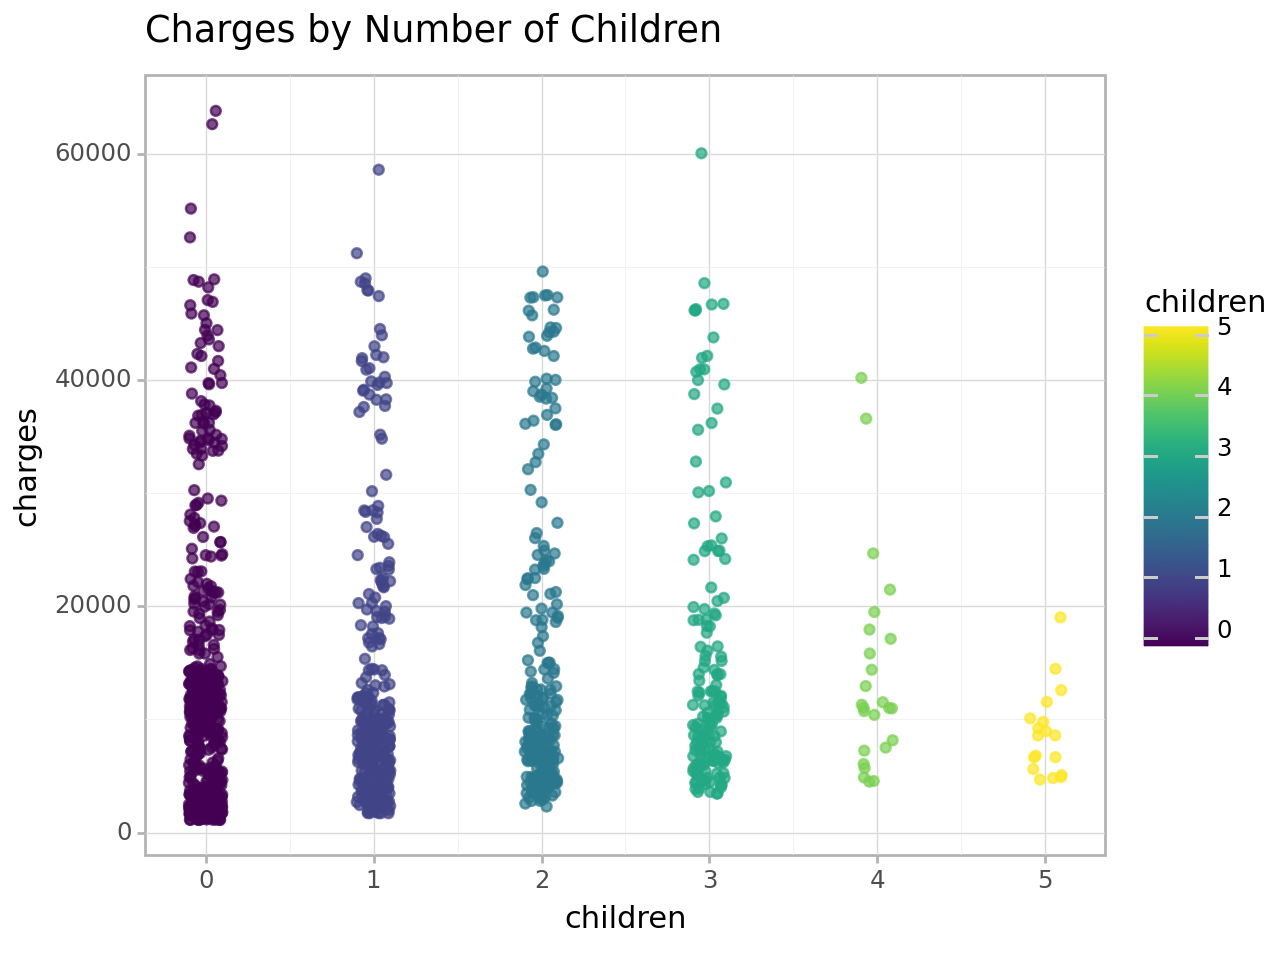

<Figure Size: (640 x 480)>

In [28]:
from IPython.display import display
# Create the plots using plotnine
plot_sex = (ggplot(data, aes('sex', 'charges', color='sex')) +
            geom_jitter(width=0.1, alpha=0.7) +
            theme_light() +
            ggtitle("Charges by Sex"))

plot_children = (ggplot(data, aes('children', 'charges', color='children')) +
                 geom_jitter(width=0.1, alpha=0.7) +
                 theme_light() +
                 ggtitle("Charges by Number of Children"))
display(plot_sex)
display(plot_children)


### 3. Correlation between Charges and Smoker / Region

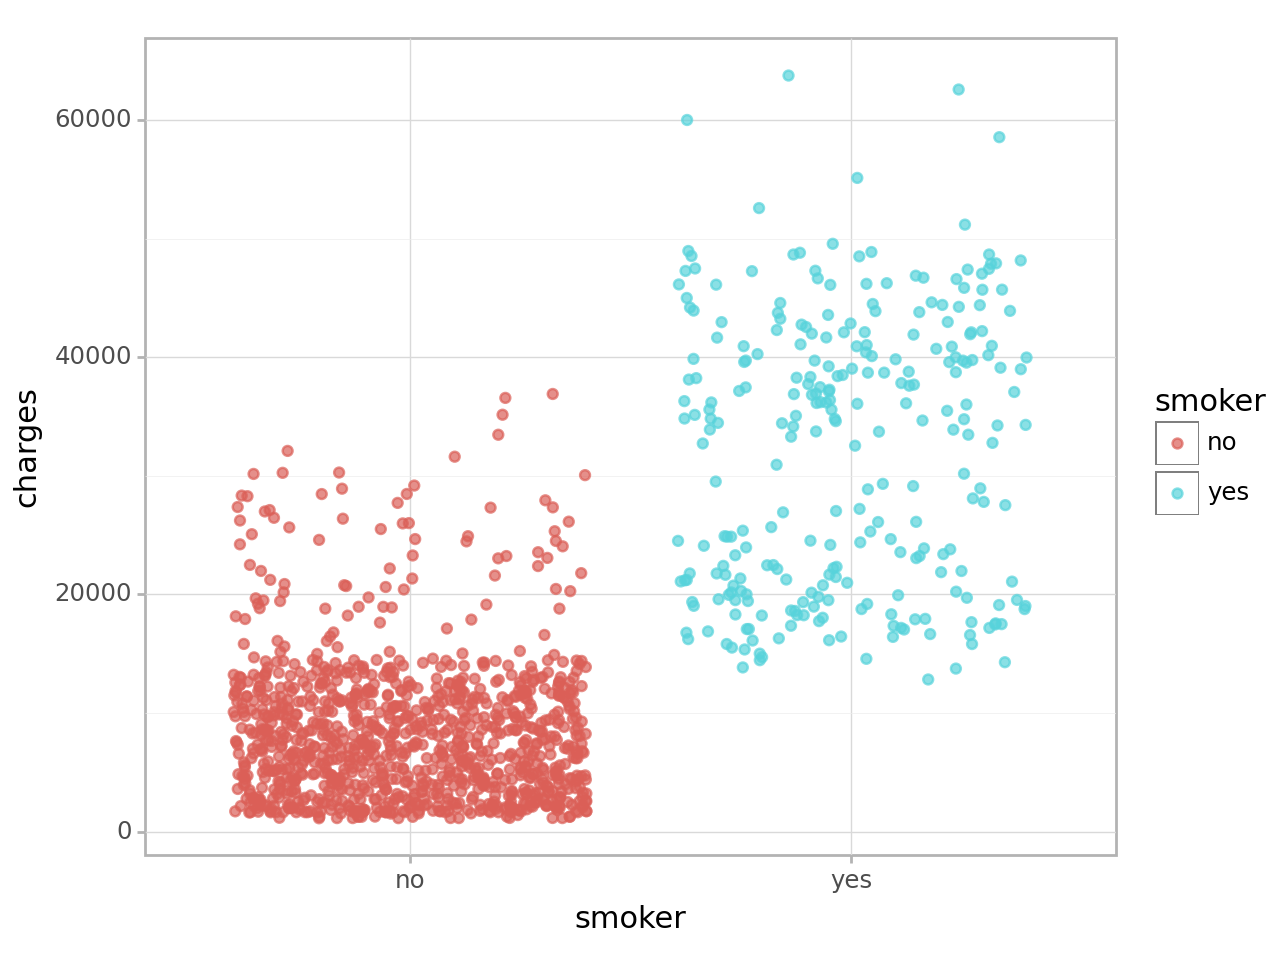

<Figure Size: (640 x 480)>

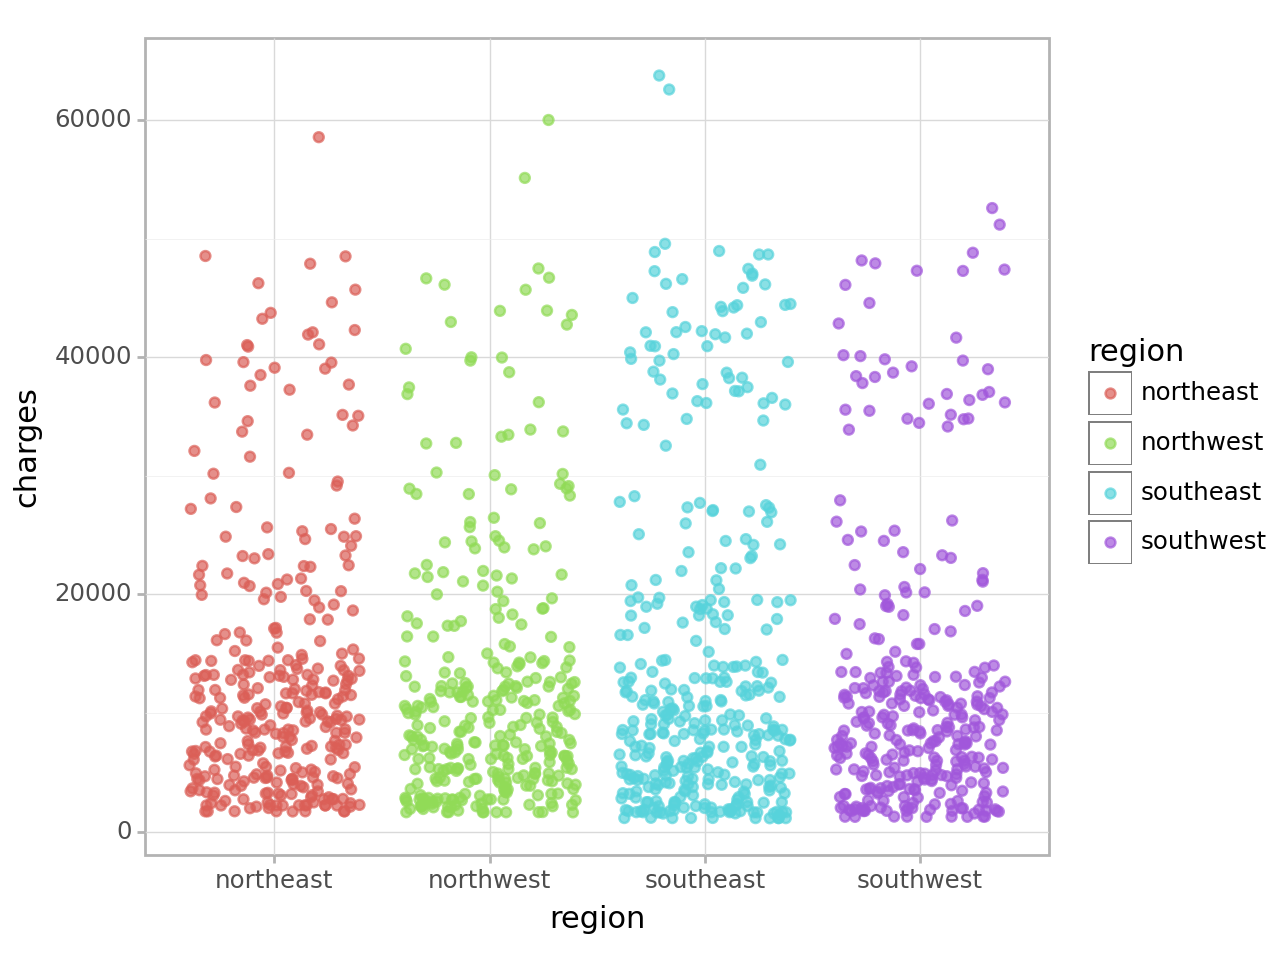

<Figure Size: (640 x 480)>

In [36]:
# Plot 3: Charges and Smoker / Region
p5 = (ggplot(data, aes('smoker', 'charges', color='smoker')) +
      geom_jitter(alpha=0.7) +
      theme_light())
p6 = (ggplot(data, aes('region', 'charges', color='region')) +
      geom_jitter(alpha=0.7) +
      theme_light())

display(p5)
display(p6)


## Linear Regression Model
### Splitting the Data:



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
train_data, test_data = train_test_split(data_encoded, train_size=0.8, random_state=123)


## Train the Model

In [42]:

# Automatically select all columns except the target as features
target = 'charges'
features = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']



# Train the model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

LinearRegression()

### Model Evaluation:



In [43]:
predictions = model.predict(test_data[features])
mse = mean_squared_error(test_data['charges'], predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 5527.42593044226


### Training and Testing the New Model


In [44]:
features_ = ['age', 'bmi', 'children','smoker_yes', 'region_northeast', 'region_northwest', 'region_southwest']

model_1 = LinearRegression()
model_1.fit(train_data[features_], train_data['charges'])

predictions_1 = model_1.predict(test_data[features_])
mse_1 = mean_squared_error(test_data['charges'], predictions_1)
rmse_1 = np.sqrt(mse_1)
print(f"RMSE for the new model: {rmse_1:.2f}")


RMSE for the new model: 5528.47


### Comparing Models


In [45]:
from sklearn.metrics import r2_score

r2_0 = r2_score(test_data['charges'], predictions)
r2_1 = r2_score(test_data['charges'], predictions_1)

print(f"R-squared for first model: {r2_0:.4f}")
print(f"R-squared for new model: {r2_1:.4f}")
print(f"RMSE for first model: {rmse:.2f}")
print(f"RMSE for new model: {rmse_1:.2f}")


R-squared for first model: 0.8002
R-squared for new model: 0.8001
RMSE for first model: 5527.43
RMSE for new model: 5528.47


### Model Performance Visualization


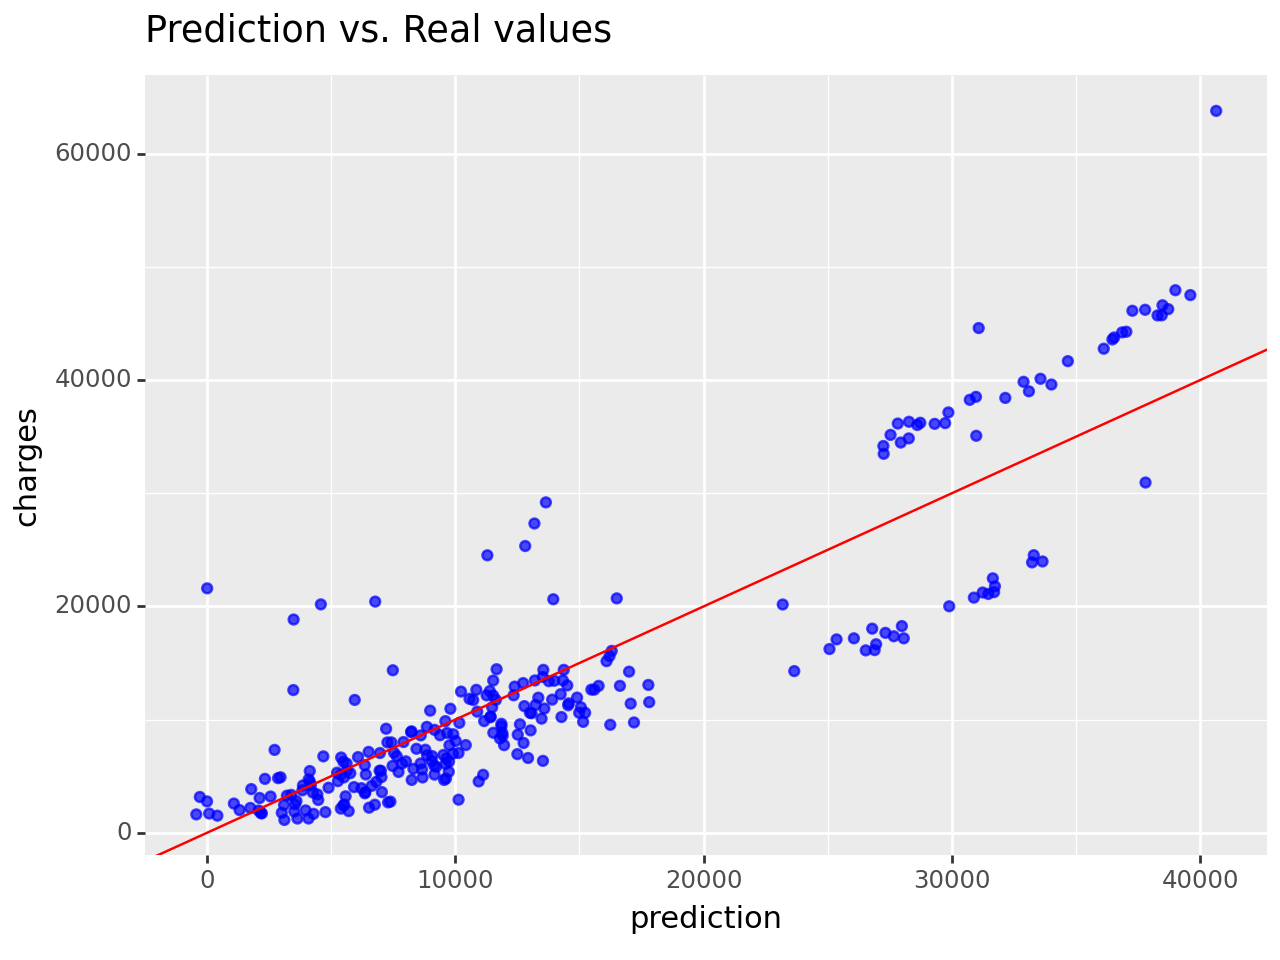

<Figure Size: (640 x 480)>

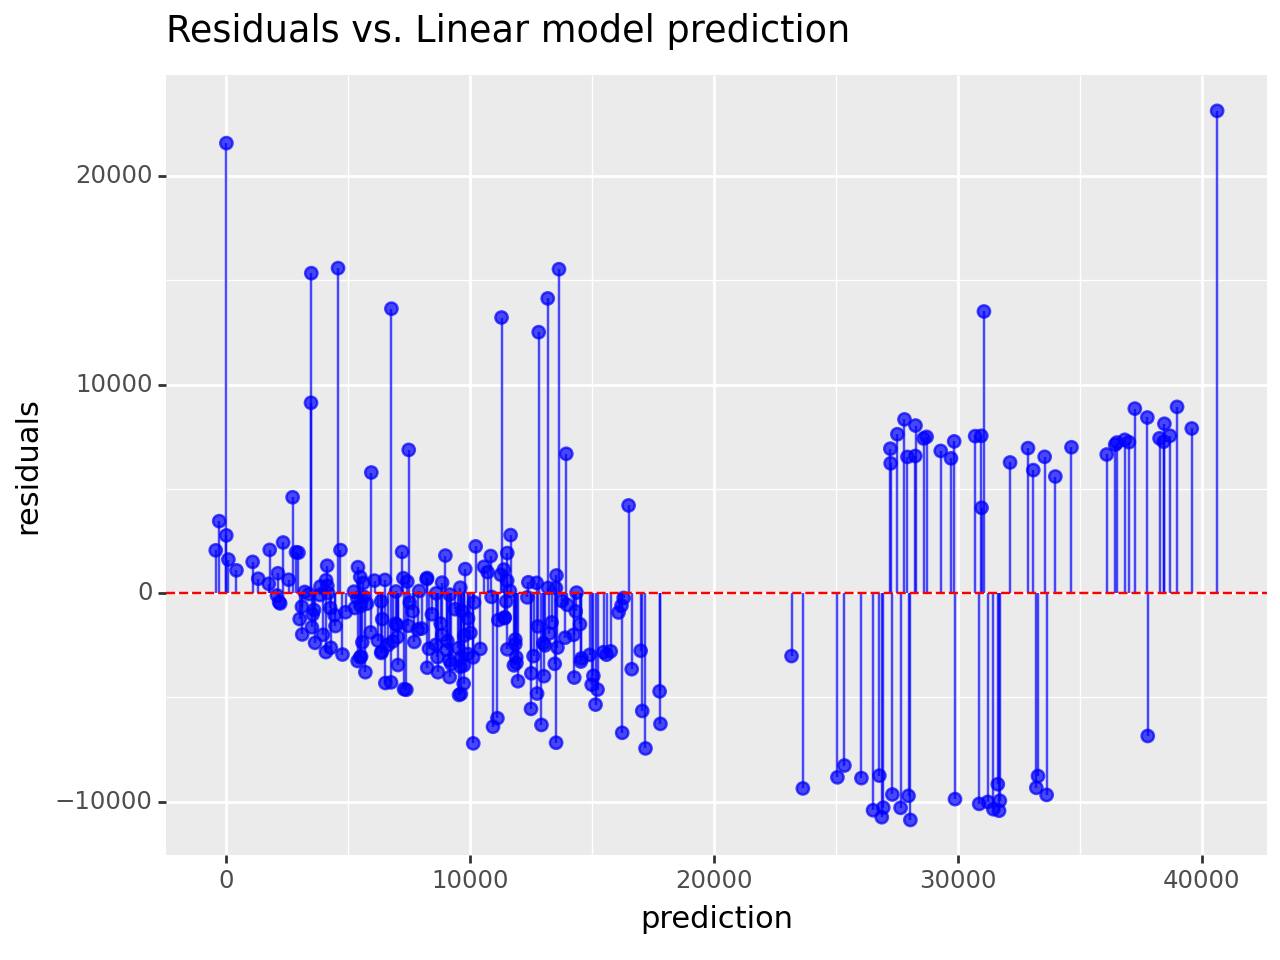

<Figure Size: (640 x 480)>

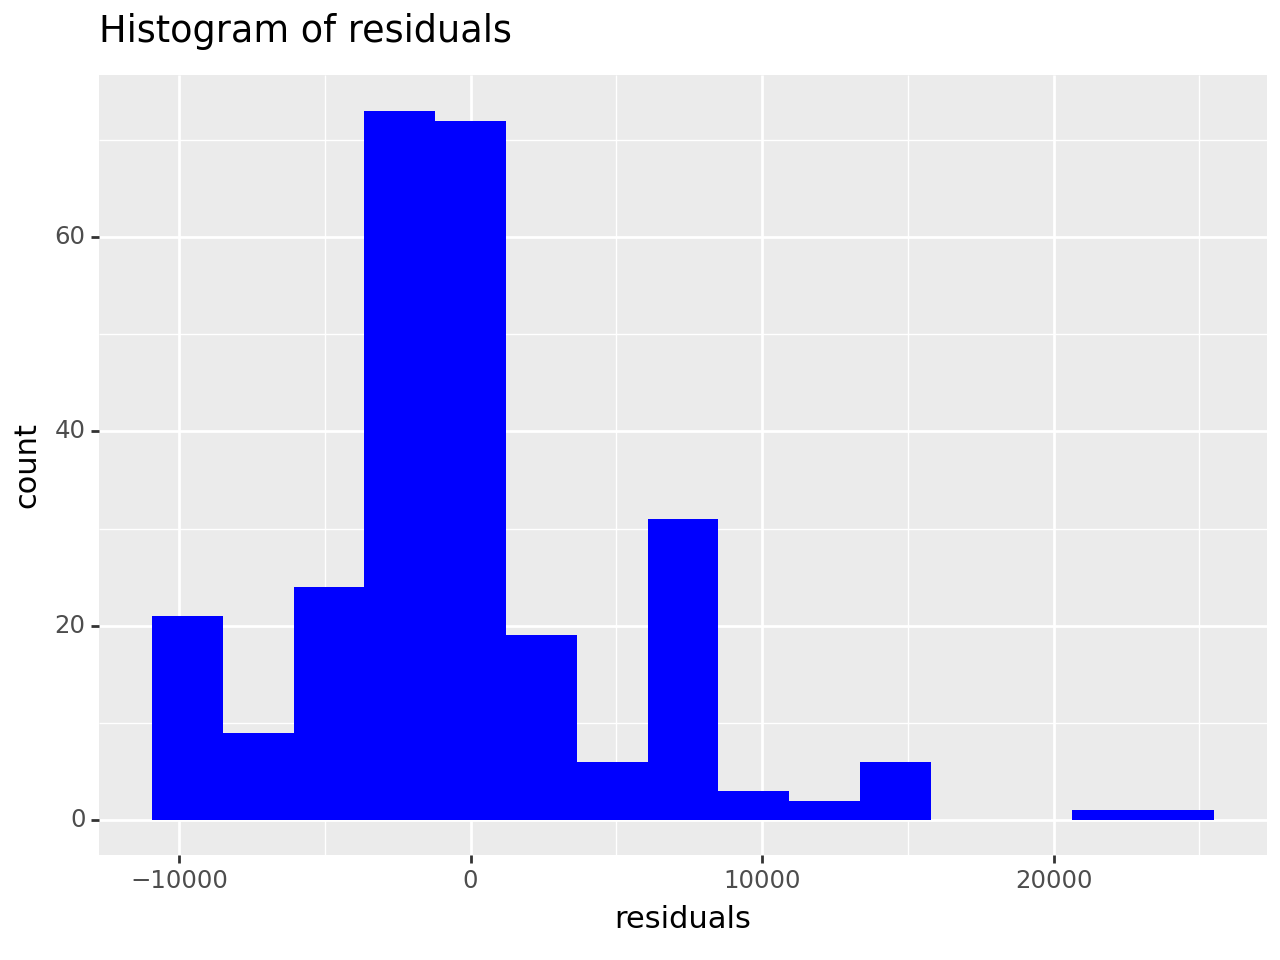

<Figure Size: (640 x 480)>

In [48]:
test_data['prediction'] = predictions_1
test_data['residuals'] = test_data['charges'] - test_data['prediction']

p7 = (ggplot(test_data, aes('prediction', 'charges')) +
      geom_point(color="blue", alpha=0.7) +
      geom_abline(color="red") +
      ggtitle("Prediction vs. Real values"))

p8 = (ggplot(test_data, aes('prediction', 'residuals')) +
      geom_pointrange(aes(ymin=0, ymax='residuals'), color="blue", alpha=0.7) +
      geom_hline(yintercept=0, linetype='dashed', color="red") +  # Corrected linetype here
      ggtitle("Residuals vs. Linear model prediction"))

p9 = (ggplot(test_data, aes('residuals')) +
      geom_histogram(bins=15, fill="blue") +
      ggtitle("Histogram of residuals"))

# Display the plots
display(p7)
display(p8)
display(p9)

## Applying on New Data


In [47]:

bob = pd.DataFrame({
    'age': [19],
    'bmi': [27.9],
    'children': [0],
    'sex_female': [0], # Include both 'sex_female' and 'sex_male' columns
    'sex_male': [1],
    'smoker_no': [0], # Include both 'smoker_yes' and 'smoker_no' columns
    'smoker_yes': [1],
    'region_northeast': [0], # Include all region columns
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

lisa = pd.DataFrame({
    'age': [40],
    'bmi': [50],
    'children': [2],
    'smoker_yes': [0],
    'region_northeast': [0],
    'region_northwest': [0],
    'region_southwest': [0]
})

john = pd.DataFrame({
    'age': [30],
    'bmi': [31.2],
    'children': [0],
    'smoker_yes': [0],
    'region_northeast': [1],
    'region_northwest': [0],
    'region_southwest': [0]
})

# Predict and print
bob_charge = model.predict(bob)
lisa_charge = model_1.predict(lisa)
john_charge = model_1.predict(john)

print(f"Health care charges for Bob: {bob_charge[0]:.2f}")
print(f"Health care charges for Lisa: {lisa_charge[0]:.2f}")
print(f"Health care charges for John: {john_charge[0]:.2f}")


Health care charges for Bob: 25585.85
Health care charges for Lisa: 15349.25
Health care charges for John: 6488.48
